<a href="https://colab.research.google.com/github/nryeo/project2/blob/main/AI_16_%EC%98%A4%ED%98%9C%EC%A7%84_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **공공도서관 대출 수요 예측 요인 탐색**

## **프로젝트의 배경 및 목표**



### **배경** </br>
공공도서관은 공중의 정보이용, 문화활동, 독서활동 및 평생교육을 위하여 국가 또는 지방자치단체 및 「지방교육자치에 관한 법률」 제32조에 따라 교육감이 설립 운영하는 도서관 또는 법인, 단체 및 개인이 설립 운영하는 도서관이다.

- 도서관에서는 매해 희망도서 신청을 받고 있지만, 한정된 예산 내에서 많은 이용자들이 혜택을 보기를 원한다. 특수주제 자료 구축이 아닌 한, 희망도서 신청 뿐만 아니라 실제로 대출이 많이 이루어지는 책을 파악하여 구매권수를 조정하려고 한다.

### **선행분석**

- 공공도서관 관련 선행연구
  - 외적요인 </br>
    - 지리적 접근성: 도서관과 거주지, 버스정류장까지의 거리
    - 인구사회학적 요인: 지역의 인구 및 경제적 환경 변화
    - 교통 및 환경 요인: 인근 공원과의 연계
    - 기상요인: 강우, 폭염
  - 내적요인 </br>
    - 도서관 시설 규모, 자료 규모, 프로그램 등 이용자 활동


### **도서관의 변화**
- 코로나로 인한 비대면 전환 노력
- 워킹 스루 형태 운영하거나 전자자료 확충 필요

- 접근성도 중요하지만, 내적 요인(장서보유 등)의 중요성 증가

> - 내적요인(소장자료) 관련 도서관 통계 확인(도서관 정보나루 제공)
  - 지역별 주제에 따른 대출 차이 존재
  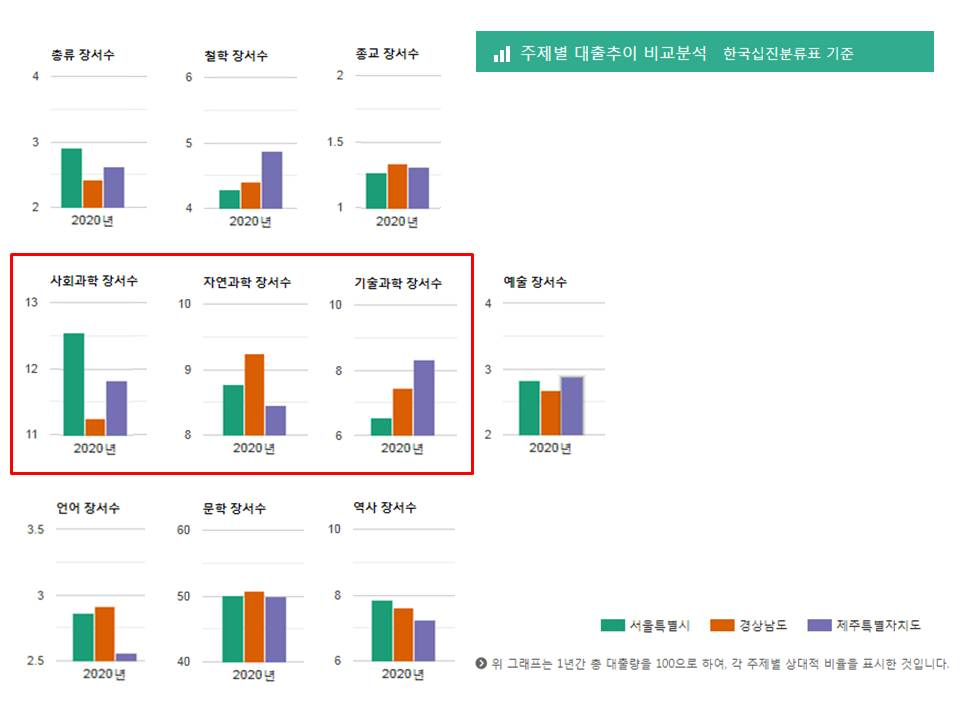





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 통합하여 한 눈에 보기 위해, 위 그래프 엑셀자료 다운로드
df_local = pd.read_excel('./codestates AIB16/section2/project2/2020년 주제별 지역별 대출추이 비교.xlsx', index_col = 0)
df_local_Theme = df_local.T.reset_index()
df_local_Theme.columns = ['주제', '서울', '경남', '제주']
df_local_Theme
# 1년간 총 대출량을 100으로 했을 때, 각 주제별 상대적 비율

,주제,서울,경남,제주
0,총류,2.90,2.42,2.62
1,철학,4.29,4.41,4.87
2,종교,1.27,1.34,1.31
3,사회과학,12.54,11.26,11.83
4,자연과학,8.77,9.24,8.45
5,기술과학,6.55,7.43,8.33
6,예술,2.82,2.68,2.88
7,언어,2.86,2.91,2.56
8,문학,50.14,50.69,49.91
9,역사,7.86,7.62,7.25


In [ ]:
# 컬럼의 지역명을 새 컬럼으로 만들어주고, 
df_local_s = df_local_Theme[['주제','서울']].copy()
df_local_s.rename(columns = {'서울':'대출비율'}, inplace = True)
df_local_s['지역'] = pd.Series(['서울'] * len(df_local_s))

df_local_k = df_local_Theme[['주제','경남']].copy()
df_local_k.rename(columns = {'경남':'대출비율'}, inplace = True)
df_local_k['지역'] = pd.Series(['경남'] * len(df_local_k))

df_local_j = df_local_Theme[['주제','제주']].copy()
df_local_j.rename(columns = {'제주':'대출비율'}, inplace = True)
df_local_j['지역'] = pd.Series(['제주'] * len(df_local_j))

df_local_list = [df_local_s, df_local_k, df_local_j]
df_local_all = pd.concat(df_local_list, ignore_index = True)
df_local_all.rename(columns = {'주제':'KDC', '대출비율':'loan ratio', '지역':'location'}, inplace=True)

# 한글 폰트 깨져서 한글을 영어로 변경
df_local_all['KDC'] = df_local_all['KDC'].replace('총류','General') 
df_local_all['KDC'] = df_local_all['KDC'].replace('철학', 'Philosoghy')
df_local_all['KDC'] = df_local_all['KDC'].replace('종교', 'Religion')
df_local_all['KDC'] = df_local_all['KDC'].replace('사회과학', 'SocialScience')
df_local_all['KDC'] = df_local_all['KDC'].replace('자연과학','Science')
df_local_all['KDC'] = df_local_all['KDC'].replace('기술과학', 'Technology') 
df_local_all['KDC'] = df_local_all['KDC'].replace('예술', 'Art')
df_local_all['KDC'] = df_local_all['KDC'].replace('언어', 'Language') 
df_local_all['KDC'] = df_local_all['KDC'].replace('문학', 'Literature') 
df_local_all['KDC'] = df_local_all['KDC'].replace('역사', 'History')

df_local_all['location'] = df_local_all['location'].replace('서울', 'Seoul')
df_local_all['location'] = df_local_all['location'].replace('경남', 'KN')
df_local_all['location'] = df_local_all['location'].replace('제주', 'Jeju')
df_local_all

,KDC,loan ratio,location
0,General,2.90,Seoul
1,Philosoghy,4.29,Seoul
2,Religion,1.27,Seoul
3,SocialScience,12.54,Seoul
4,Science,8.77,Seoul
5,Technology,6.55,Seoul
6,Art,2.82,Seoul
7,Language,2.86,Seoul
8,Literature,50.14,Seoul
9,History,7.86,Seoul


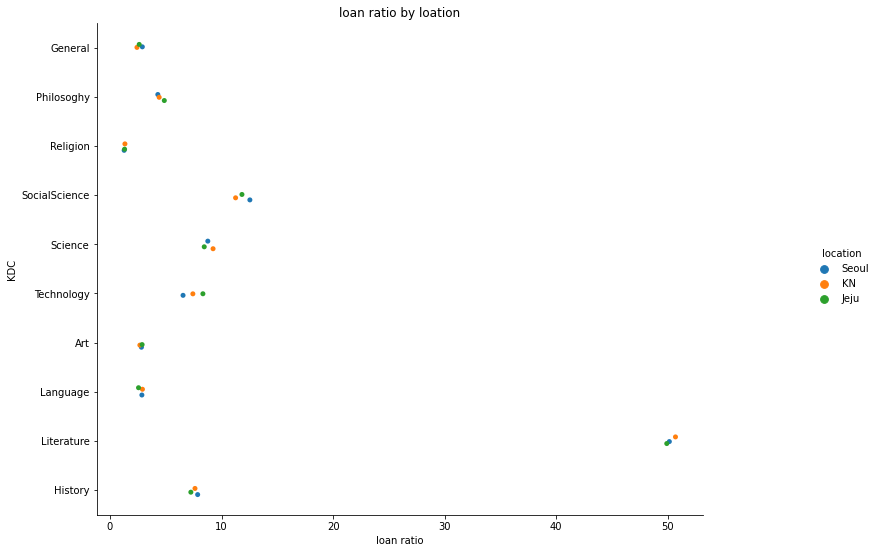

In [ ]:
s = sns.catplot(x= 'loan ratio', y= 'KDC', hue= 'location', data = df_local_all)
s.fig.set_size_inches(15, 8)
plt.title('loan ratio by loation')
plt.show()

- 지역 특성에 따라 선호 주제가 다를 수 있음을 확인하였다. </br>
  이에 따라 다음과 같은 연구문제를 설정하였다.

> **연구문제: 공공도서관 이용자들의 인기대출도서 주제를 예측했을 때, 어떤 특성이 영향력이 높은 특성인가**

## **데이터 수집**

인기대출도서주제 예측을 위해 다음과 같은 정보를 이용하였다.</br>
- 수집처: 도서관 정보나루 인기대출도서 데이터(https://www.data4library.kr/loanDataL)
- 제  공: 국립중앙도서관
- 대출 기간: 2020-01-01 ~ 2020-12-31
- 구  분: 
  - 성  별 : 남성 / 여성
  - 연령별 : 2030 청년층 / 4050 중년층 / 60이상 노년층
  - 지역별 : 서울 / 경남 / 제주
- 각 구분 조합별 인기대출도서 200건씩 이용
  - 이용자료 : 순위, 도서명, 저자, 출판사, 출판년도, KDC, 대출건수

* KDC: 한국십진분류법(Korean Decimal Classification)
  - 도서분류법 보는 방법</br>
      ![도서분류법 읽기](https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODAxMTNfNjYg%2FMDAxNTE1ODQyMzUyNjIy.x5FwznuxsJZfVxnLjmuV9cb5nLVkb_zgwzdUmv5Y-OMg.g5BUjpqLYX6P2hcIf540iK9znGXipEU-GjZVZlG2Ha0g.PNG.sgjjojo%2F%25C1%25D6%25B0%25AD%25B8%25F1%25BC%25BC-%25BC%25B3%25B8%25ED.png&type=l340_165)

  - 한국십진분류표


<!-- 000 총류 -->
<div class="kdc000">
<dl>
<dt>000 총류</dt>

<dd>010 도서관,서지학</dd>
<dd>020 문헌정보학</dd>
<dd>030 백과사전</dd>
<dd>040 강연집, 수필집, 연설문집</dd>
<dd>050 일반 연속간행물</dd>
<dd>060 일반학회, 단체, 협회, 기관</dd>
<dd>070 신문, 언론, 저널리즘</dd>
<dd>080 일반전집, 총서</dd>
<dd>090 향토자료</dd>
</dl>
</div>


<!-- 100 철학 -->
<div class="kdc100">
<dl>
<dt>100 철학</dt>

<dd>110 형이상학</dd>
<dd>120 인식론, 인과론, 인간학</dd>
<dd>130 철학의 체계</dd>
<dd>140 경학</dd>
<dd>150 아시아철학,사상</dd>
<dd>160 서양철학</dd>
<dd>170 논리학</dd>
<dd>180 심리학</dd>
<dd>190 윤리학,도덕철학</dd>
</dl>
</div>


<!-- 200 종교 -->
<div class="kdc200">
<dl>
<dt>200 종교</dt>

<dd>210 비교종교</dd>
<dd>220 불교</dd>
<dd>230 기독교</dd>
<dd>240 도교</dd>
<dd>250 천도교</dd>
<dd>260 신도</dd>
<dd>270 파라문교, 인도교</dd>
<dd>280 회교(이슬람교)</dd>
<dd>290 기타 제종교</dd>
</dl>
</div>



<!-- 300 사회과학 -->
<div class="kdc300">
<dl>
<dt>300 사회과학</dt>

<dd>310 통계학</dd>
<dd>320 경제학</dd>
<dd>330 사회학, 사회문제</dd>
<dd>340 정치학</dd>
<dd>350 행정학</dd>
<dd>360 법학</dd>
<dd>370 교육학</dd>
<dd>380 풍속, 민속학</dd>
<dd>390 국방, 군사학</dd>
</dl>
</div>



<!-- 400 자연과학 -->
<div class="kdc400">
<dl>
<dt>400 자연과학</dt>

<dd>410 수학</dd>
<dd>420 물리학</dd>
<dd>430 화학</dd>
<dd>440 천문학</dd>
<dd>450 지학</dd>
<dd>460 광물학</dd>
<dd>470 생명과학</dd>
<dd>480 식물학</dd>
<dd>490 동물학</dd>
</dl>
</div>



<!-- 500 기술과학 -->
<div class="kdc500">
<dl>
<dt>500 기술과학</dt>

<dd>510 의학</dd>
<dd>520 농업,농학</dd>
<dd>530 공학, 공학일반</dd>
<dd>540 건축공학</dd>
<dd>550 기계공학</dd>
<dd>560 전기공학, 전자공학</dd>
<dd>570 화학공학</dd>
<dd>580 제조업</dd>
<dd>590 가정학 및 가정생활</dd>
</dl>
</div>


<!-- 600 예술 -->
<div class="kdc600">
<dl>
<dt>600 예술</dt>

<dd>610 건축술</dd>
<dd>620 조각</dd>
<dd>630 공예, 장식미술</dd>
<dd>640 서예</dd>
<dd>650 회화, 도화</dd>
<dd>660 사진술</dd>
<dd>670 음악</dd>
<dd>680 연극</dd>
<dd>690 오락, 운동</dd>
</dl>
</div>


<!-- 700 언어 -->
<div class="kdc700">
<dl>
<dt>700 언어</dt>

<dd>710 한국어</dd>
<dd>720 중국어</dd>
<dd>730 일본어</dd>
<dd>740 영어</dd>
<dd>750 독일어</dd>
<dd>760 프랑스어</dd>
<dd>770 스페인어</dd>
<dd>780 이탈리아어</dd>
<dd>790 기타제어</dd>
</dl>
</div>



<!-- 800 문학 -->
<div class="kdc800">
<dl>
<dt>800 문학</dt>

<dd>810 한국문학</dd>
<dd>820 중국문학</dd>
<dd>830 일본문학</dd>
<dd>840 영미문학</dd>
<dd>850 독일문학</dd>
<dd>860 프랑스문학</dd>
<dd>870 스페인문학</dd>
<dd>880 이탈리아문학</dd>
<dd>890 기타 제문학</dd>
</dl>
</div>


<!-- 900 역사 -->
<div class="kdc900">
<dl>
<dt>900 역사</dt>

<dd>910 아시아(아세아)</dd>
<dd>920 유럽(구라파)</dd>
<dd>930 아프리카</dd>
<dd>940 북아메리카(북미)</dd>
<dd>950 남아메리카(남미)</dd>
<dd>960 오세아니아(대양주)</dd>
<dd>970 양극지방</dd>
<dd>980 지리</dd>
<dd>990 전기</dd>
</dl>
</div>


<!-- kdc_box -->
</div>

In [ ]:
df_SW = pd.read_csv('./codestates AIB16/section2/project2/2020WSU.csv')
df_SM = pd.read_csv('./codestates AIB16/section2/project2/2020MSU.csv', encoding = 'cp949')
df_KW = pd.read_csv('./codestates AIB16/section2/project2/2020WKN.csv', encoding = 'cp949')
df_KM = pd.read_csv('./codestates AIB16/section2/project2/2020MKN.csv', encoding = 'cp949')
df_JW = pd.read_csv('./codestates AIB16/section2/project2/2020WJJ.csv', encoding = 'cp949')
df_JM = pd.read_csv('./codestates AIB16/section2/project2/2020MJJ.csv', encoding = 'cp949')

In [ ]:
df_list = [df_SW, df_SM, df_KW, df_KM, df_JW, df_JM]
df_all = pd.concat(df_list, ignore_index = True)
df_all

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,연령,위치,성별,대출기간
0,1,일의 기쁨과 슬픔 :장류진 소설집,지은이: 장류진,창비,2019,NaN,9.790000e+12,3810.0,813.70,"1,088",2030,서울,여,2020
1,2,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,NaN,9.790000e+12,3810.0,813.70,"1,042",2030,서울,여,2020
2,3,선량한 차별주의자,김지혜 지음,창비,2019,NaN,9.790000e+12,3300.0,334.00,"1,028",2030,서울,여,2020
3,4,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,NaN,9.790000e+12,3810.0,813.70,"1,025",2030,서울,여,2020
4,5,여행의 이유 :김영하 산문,지은이: 김영하,문학동네,2019,NaN,9.790000e+12,3810.0,816.62,952,2030,서울,여,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,140,질문이 멈춰지면 스스로 답이 된다 :선방 수좌의 공부 기록,원제 지음,불광출판사,2019,NaN,9.788970e+12,3100.0,224.30,5,60,제주,남,2020
3596,140,(아디야샨티의) 가장 중요한 것 :삶의 가장 깊은 중심에 두어야 할 단 하나의 진실,아디야샨티 지음 ;이창엽 옮김,불광출판사,2020,NaN,9.788970e+12,3200.0,224.30,5,60,제주,남,2020
3597,140,늑대의 왕,지은이: 니클라스 나트 오크 다그 ;옮긴이: 송섬별,세종서적,2019,NaN,9.788980e+12,3850.0,859.70,5,60,제주,남,2020
3598,140,나는 왜 쓰는가 :조지 오웰 에세이,지은이: 조지 오웰 ;옮긴이: 이한중,한겨레출판,2010,NaN,9.788980e+12,3840.0,844.00,5,60,제주,남,2020


In [ ]:
df_all.duplicated().sum()

0

## 분석변수
KDC가 예측을 원하는 목표값으로 결측이 있는 경우엔 분석이 불가능하기 때문에 해당 데이터를 모두 제외하였다. </br>
또한, 예측변수 연령, 위치, 성별 외에는 전부 제거하였다.

In [ ]:
df_use = df_all[['서명', '저자', '출판사', '출판년도', 'KDC', '연령', '위치', '성별']].copy()
df_use

,서명,저자,출판사,출판년도,KDC,연령,위치,성별
0,일의 기쁨과 슬픔 :장류진 소설집,지은이: 장류진,창비,2019,813.70,2030,서울,여
1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,813.70,2030,서울,여
2,선량한 차별주의자,김지혜 지음,창비,2019,334.00,2030,서울,여
3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,813.70,2030,서울,여
4,여행의 이유 :김영하 산문,지은이: 김영하,문학동네,2019,816.62,2030,서울,여
...,...,...,...,...,...,...,...,...
3595,질문이 멈춰지면 스스로 답이 된다 :선방 수좌의 공부 기록,원제 지음,불광출판사,2019,224.30,60,제주,남
3596,(아디야샨티의) 가장 중요한 것 :삶의 가장 깊은 중심에 두어야 할 단 하나의 진실,아디야샨티 지음 ;이창엽 옮김,불광출판사,2020,224.30,60,제주,남
3597,늑대의 왕,지은이: 니클라스 나트 오크 다그 ;옮긴이: 송섬별,세종서적,2019,859.70,60,제주,남
3598,나는 왜 쓰는가 :조지 오웰 에세이,지은이: 조지 오웰 ;옮긴이: 이한중,한겨레출판,2010,844.00,60,제주,남


In [ ]:
# 서명, 저자, 출판사, 출판년도 드롭
# 저자, 출판사는 데이터 누수 관련
df_dropped = df_use.copy()[['연령', '위치', '성별', 'KDC']].reset_index(drop=True)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연령      3600 non-null   int64  
 1   위치      3600 non-null   object 
 2   성별      3600 non-null   object 
 3   KDC     3578 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 112.6+ KB


In [ ]:
df_clean = df_dropped.copy()
df_clean.rename(columns = {'연령':'ages', '위치':'location', '성별':'gender'}, inplace=True)

# 인코딩
ages_mapping = {2030:1, 4050:2, 60:3}
df_clean['ages'] = df_clean['ages'].map(ages_mapping)

location_mapping = {'서울':1, '경남':2, '제주':3}
df_clean['location'] = df_clean['location'].map(location_mapping)

gender_mapping = {'남':1, '여':2}
df_clean['gender'] = df_clean['gender'].map(gender_mapping)

df_clean

,ages,location,gender,KDC
0,1,1,2,813.70
1,1,1,2,813.70
2,1,1,2,334.00
3,1,1,2,813.70
4,1,1,2,816.62
...,...,...,...,...
3595,3,3,1,224.30
3596,3,3,1,224.30
3597,3,3,1,859.70
3598,3,3,1,844.00


In [ ]:
df_clean.dropna(subset=['KDC'], inplace=True)
df_clean.reset_index(drop=True)

,ages,location,gender,KDC
0,1,1,2,813.70
1,1,1,2,813.70
2,1,1,2,334.00
3,1,1,2,813.70
4,1,1,2,816.62
...,...,...,...,...
3573,3,3,1,224.30
3574,3,3,1,224.30
3575,3,3,1,859.70
3576,3,3,1,844.00


In [ ]:
# KDC 세목 버림 및 object
import math

for i in range(0, len(df_clean['KDC'])):
  df_clean['KDC'].iloc[i] = math.trunc(df_clean['KDC'].iloc[i])
  

df_clean

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ages,location,gender,KDC
0,1,1,2,813.0
1,1,1,2,813.0
2,1,1,2,334.0
3,1,1,2,813.0
4,1,1,2,816.0
...,...,...,...,...
3595,3,3,1,224.0
3596,3,3,1,224.0
3597,3,3,1,859.0
3598,3,3,1,844.0


In [ ]:
df_clean['KDC'] = df_clean['KDC'].astype(int)
df_clean

,ages,location,gender,KDC
0,1,1,2,813
1,1,1,2,813
2,1,1,2,334
3,1,1,2,813
4,1,1,2,816
...,...,...,...,...
3595,3,3,1,224
3596,3,3,1,224
3597,3,3,1,859
3598,3,3,1,844


In [ ]:
df_clean.drop(df_clean[df_clean['KDC']<100].index, axis=0, inplace = True)
df_clean.reset_index(drop=True)

,ages,location,gender,KDC
0,1,1,2,813
1,1,1,2,813
2,1,1,2,334
3,1,1,2,813
4,1,1,2,816
...,...,...,...,...
3531,3,3,1,224
3532,3,3,1,224
3533,3,3,1,859
3534,3,3,1,844


In [ ]:
df_clean['KDC'] = df_clean['KDC'].astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ages      3536 non-null   int64 
 1   location  3536 non-null   int64 
 2   gender    3536 non-null   int64 
 3   KDC       3536 non-null   object
dtypes: int64(3), object(1)
memory usage: 138.1+ KB


In [ ]:
df_counts = df_clean['KDC'].value_counts().to_frame()
drop_KDC = df_counts[df_counts['KDC']==1].index
drop_KDC

Index(['351', '114', '710', '883', '380', '223', '409', '549', '420', '920',
       '112', '148', '846', '301', '701', '720', '185', '349', '662', '821',
       '126', '620', '595', '921', '194', '191', '187', '636', '370', '209',
       '234', '918', '653', '617', '830', '374', '372', '873', '330', '804',
       '364', '450', '727', '879', '300', '910', '238'],
      dtype='object')

In [ ]:
# for i in range(0, len(drop_KDC)):

drop_index = df_clean[df_clean['KDC'].isin(drop_KDC)].index
df_clean.drop(drop_index, axis=0, inplace=True)
df_clean.reset_index(drop=True)

,ages,location,gender,KDC
0,1,1,2,813
1,1,1,2,813
2,1,1,2,334
3,1,1,2,813
4,1,1,2,816
...,...,...,...,...
3484,3,3,1,224
3485,3,3,1,224
3486,3,3,1,859
3487,3,3,1,844


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


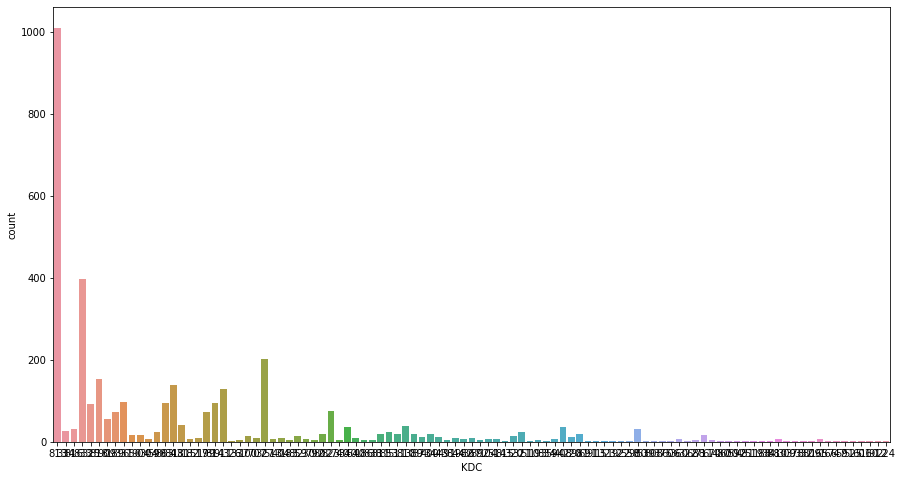

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df_clean['KDC']) #categorical한 값의 분포를 나타내는 함수
plt.show()

In [ ]:
# 세트 분리
target = 'KDC'
features = ['ages','location','gender']

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, train_size = 0.8, stratify = df_clean[target], random_state=42)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train

(2791, 3) (2791,) (698, 3) (698,)


,ages,location,gender
1176,3,1,1
1790,3,2,2
36,1,1,2
3254,2,3,1
2036,2,2,1
...,...,...,...
1623,3,2,2
1149,3,1,1
1890,1,2,1
2045,2,2,1


In [ ]:
# 타겟이 KDC기호를 예측하는 것이므로 분류 문제이다.
# 기준모델: 최빈값
baseline = y_train.mode()
baseline

0    813
dtype: object

## **분석방법**


In [ ]:
from sklearn.utils.extmath import softmax
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.metrics import classification_report

model = XGBClassifier(objective = 'multi:softmax', random_state=42)

dists = {'xgbclassifier__max_depth':randint(2,10),
         'xgbclassifier__min_child_weight':randint(1,8),
         'xgbclassifier__scale_pos_weight':(1,'balanced')}

clf = RandomizedSearchCV(
    model,
    param_distributions = dists, 
    n_iter = 5, 
    cv = 3, 
    scoring = 'accuracy',
    n_jobs = -1
)


clf = clf.fit(X_train, y_train,  
        eval_metric = 'error')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
print('optimal hyperparameter:', clf.best_params_, '\n'
      'accuracy:', clf.best_score_)

optimal hyperparameter: {'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 6, 'xgbclassifier__scale_pos_weight': 'balanced'} 
accuracy: 0.2902197891040967


In [ ]:
predict_value = clf.predict(X_train)
predict_value = pd.DataFrame(predict_value)
predict_value.value_counts()

813    2478
327     313
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
#기준모델의 정확도를 가져와서 비교
p = [baseline] * len(y_test)
base_accuracy = accuracy_score(y_test, p)
base_accuracy

0.28939828080229224

In [ ]:
print('검증정확도:', clf.score(X_test, y_test))

검증정확도: 0.2922636103151863


In [ ]:
predict_value = clf.predict(X_test)
predict_value = pd.DataFrame(predict_value)
predict_value.value_counts()

813    638
327     60
dtype: int64

813: 한국소설 </br>
327: 금융

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
predict = clf.predict(X_test)
multilabel_confusion_matrix(y_test, predict)

In [ ]:
best_model = XGBClassifier(
                           max_depth= 3, 
                           min_child_weight= 6, 
                           scale_pos_weight= 'balanced',
                           objective = 'multi:softmax',
                           random_state=42)

best_model.fit(X_train, y_train, 
               eval_metric = 'error')

XGBClassifier(min_child_weight=6, objective='multi:softprob', random_state=42,
              scale_pos_weight='balanced')

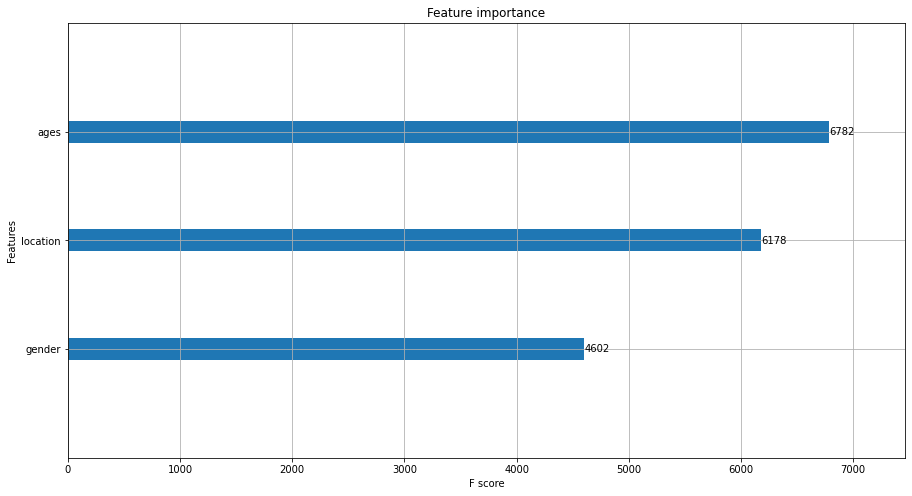

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(15,8))
plot_importance(best_model, ax=ax)

## 결론 및 제언

XGBClassifier로 공공도서관 이용자들의 인기대출도서 주제를 예측했을 때, 연령, 지역, 성별 순으로 중요하다고 파악하였습니다. 
특히 연령과 성별이 주로 고려되는 경우가 많은데, 지역요인 역시 중요함을 확인한 것에 의의가 있습니다.

더불어, 813 한국소설과 327 금융분야 책이 인기대출도서임을 알 수 있었습니다.

- 정확도가 매우 낮다는 것이 단점으로, 이를 보완하기 위한 개선이 필요합니다.
- 또한 2020년은 코로나로 인해 공공도서관 휴관이 잦았던 때여서, 다른 연도와 비교해볼 필요성이 있습니다. 
- 813 한국소설의 비중이 매우 커서, 327외의 다른 주제를 보기 어려웠으므로 813을 제외한 다른 분야들 중에서의 특징을 비교해본다면, 지역특화도서관 등의 건립 시 참고할 수 있을 것으로 생각됩니다.

## 참고자료

- 머신러닝을 활용한 기상조건에 따른 공공도서관 도서대출 수요분석, (2022), 디지털융복합연구 제20권 제3호, pp.41-52
- 한국십진분류표(KDC) 총정리, https://blog.naver.com/sgjjojo/221184479000, [조조의 게임라이프]